In [9]:
import pandas as pd
import csv

In [10]:
def process_file(input_file_name, dataset_type, combined_data):
    with open(input_file_name, 'r') as infile:
        for line in infile:
            parts = line.split()
            if len(parts) < 8:
                continue

            timestamp = parts[1] if len(parts) > 1 else ''
            try:
                id_index = parts.index('ID:') + 1
                id_ = parts[id_index] if len(parts) > id_index else ''
                dlc_index = parts.index('DLC:') + 1
                dlc = parts[dlc_index] if len(parts) > dlc_index else ''
                data_index = dlc_index + 1
                data = ' '.join(parts[data_index:]) if len(parts) > data_index else ''
            except ValueError:
                continue

            if dataset_type == 'DoS_attack_dataset.txt' and id_ == '000':
                label = 'malicious'
            elif dataset_type in ['Fuzzy_attack_dataset.txt', 'Impersonation_attack_dataset.txt'] and float(timestamp) >= 250:
                label = 'malicious'
            else:
                label = 'benign'

            combined_data.append([timestamp, id_, dlc, data, label])

In [11]:
datasets = ['Attack_free_dataset.txt', 'DoS_attack_dataset.txt', 'Fuzzy_attack_dataset.txt', 'Impersonation_attack_dataset.txt']
combined_data = []
output_file_name = 'combined_dataset.csv'

for file_name in datasets:
    file_name = './CAN Intrusion Dataset/' + file_name
    process_file(file_name, file_name, combined_data)

with open(output_file_name, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Timestamp', 'ID', 'DLC', 'Data', 'Label'])
    writer.writerows(combined_data)

print(f"Combined dataset saved to '{output_file_name}'.")

Combined dataset saved to 'combined_dataset.csv'.


In [12]:
import pandas as pd
df = pd.read_csv('combined_dataset.csv')

In [13]:
print(len(df[df['Label']=="benign"]))
print(len(df[df['Label']=="malicious"]))

4489685
0


In [6]:
df.dtypes

Timestamp    float64
ID            object
DLC            int64
Data          object
Label         object
dtype: object

In [4]:
df['Label'] = df['Label'].map({'malicious': 1, 'benign': 0})
print(df.head())

   Timestamp    ID  DLC                     Data  Label
0   0.000000  0316    8  05 20 ea 0a 20 1a 00 7f      0
1   0.000224  0329    8  d7 a7 7f 8c 11 2f 00 10      0
2   0.000462  0080    8  00 17 ea 0a 20 1a 20 43      0
3   0.000704  0081    8  7f 84 60 00 00 00 00 53      0
4   0.000878  0120    4              00 00 00 00      0


In [8]:
print(len(df[df['Label']==0]))
print(len(df[df['Label']==1]))

3353071
1136614


In [5]:
import pandas as pd

# Assuming df is your dataframe
# Convert hex data fields to integers
for i in range(8):
    df[f'Data_{i}'] = df['Data'].apply(lambda x: int(x.split()[i], 16) if len(x.split()) > i else 0)

# 1. Timestamp Processing: Calculate time intervals
df['Timestamp'] = pd.to_numeric(df['Timestamp'])
df['Time_Interval'] = df['Timestamp'].diff().fillna(0)

# 2. Message ID: One-hot encode the Message IDs
df = pd.get_dummies(df, columns=['ID'])

# 3. Data Field Processing: Statistical Features
for i in range(8):
    df[f'Mean_Data_{i}'] = df[f'Data_{i}'].rolling(window=5).mean().fillna(0)
    df[f'Std_Data_{i}'] = df[f'Data_{i}'].rolling(window=5).std().fillna(0)

# 4. Creating Derived Features
# Frequency Analysis of IDs (example for a window of 10 messages)
count_cols = [col for col in df.columns if 'ID_' in col]
df[count_cols] = df[count_cols].rolling(window=10).sum().fillna(0)

# Drop original Data column
df.drop(columns=['Data'], inplace=True)

# Display the first few rows to verify

In [10]:
print(df)

            Timestamp  DLC  Label  Data_0  Data_1  Data_2  Data_3  Data_4   
0        0.000000e+00    8      0       5      32     234      10      32  \
1        2.240000e-04    8      0     215     167     127     140      17   
2        4.620000e-04    8      0       0      23     234      10      32   
3        7.040000e-04    8      0     127     132      96       0       0   
4        8.780000e-04    4      0       0       0       0       0       0   
...               ...  ...    ...     ...     ...     ...     ...     ...   
4489680  1.481193e+09    3      1       0       2       0       0       0   
4489681  1.481193e+09    8      1       0     128      16     255       0   
4489682  1.481193e+09    8      1      14     216     127       0       0   
4489683  1.481193e+09    8      1     244       3     247       3      12   
4489684  1.481193e+09    5      1     115       0       0       7       3   

         Data_5  Data_6  ...  Mean_Data_3  Std_Data_3  Mean_Data_4   
0    

In [15]:
df.dtypes

Timestamp      float64
DLC              int64
Label            int64
Data_0           int64
Data_1           int64
                ...   
Std_Data_5     float64
Mean_Data_6    float64
Std_Data_6     float64
Mean_Data_7    float64
Std_Data_7     float64
Length: 74, dtype: object

In [11]:
df.columns

Index(['Timestamp', 'DLC', 'Label', 'Data_0', 'Data_1', 'Data_2', 'Data_3',
       'Data_4', 'Data_5', 'Data_6', 'Data_7', 'Time_Interval', 'ID_0000',
       'ID_0018', 'ID_0034', 'ID_0042', 'ID_0043', 'ID_0044', 'ID_0050',
       'ID_0080', 'ID_0081', 'ID_00a0', 'ID_00a1', 'ID_0110', 'ID_0120',
       'ID_0153', 'ID_0164', 'ID_0165', 'ID_018f', 'ID_01f1', 'ID_0220',
       'ID_0260', 'ID_02a0', 'ID_02b0', 'ID_02c0', 'ID_0316', 'ID_0329',
       'ID_0350', 'ID_0370', 'ID_0382', 'ID_043f', 'ID_0440', 'ID_04b0',
       'ID_04b1', 'ID_04f0', 'ID_04f1', 'ID_04f2', 'ID_0510', 'ID_0517',
       'ID_051a', 'ID_0545', 'ID_0587', 'ID_059b', 'ID_05a0', 'ID_05a2',
       'ID_05e4', 'ID_05f0', 'ID_0690', 'Mean_Data_0', 'Std_Data_0',
       'Mean_Data_1', 'Std_Data_1', 'Mean_Data_2', 'Std_Data_2', 'Mean_Data_3',
       'Std_Data_3', 'Mean_Data_4', 'Std_Data_4', 'Mean_Data_5', 'Std_Data_5',
       'Mean_Data_6', 'Std_Data_6', 'Mean_Data_7', 'Std_Data_7'],
      dtype='object')

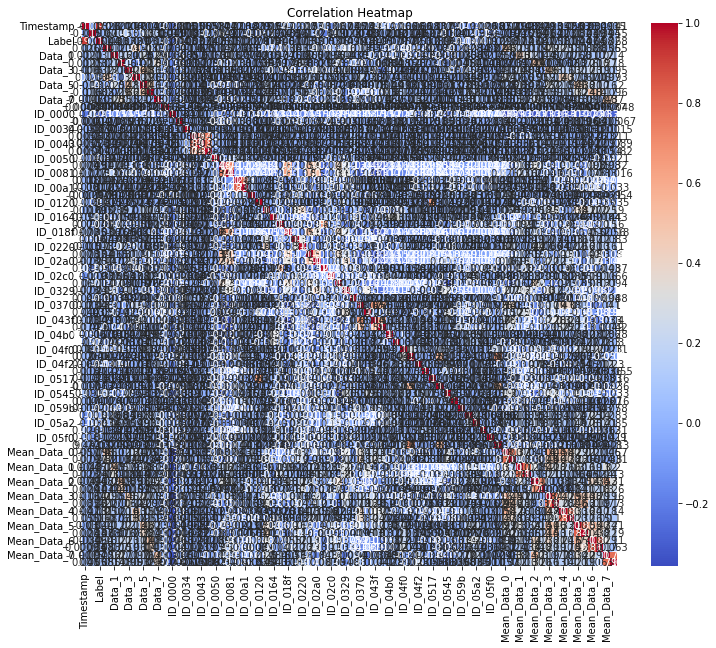

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'selected_df' contains your selected relevant features and 'Label' is the target variable
X = selected_df.drop(columns=['Label'])
y = selected_df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
'''

### Just a heads up: We are doing this so that the training doesnt take longer and the data used to train the model is balanced to we get better results for testing purpose. However, as you go down you can see that the accuracy is unrealistically high. So just see if we can tone it down to 90 or something. I tried using correlation  matrix way to select the features but could only get 3 features. So, see if you can do something about it. 


In [17]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Separate the dataset into malicious and benign subsets
malicious_data = df[df['Label'] == 1]
benign_data = df[df['Label'] == 0]

# Sample 2500 records from each subset
sampled_malicious = malicious_data.sample(n=3000, random_state=42)
sampled_benign = benign_data.sample(n=15000, random_state=42)

# Combine the sampled subsets to create a balanced dataset
balanced_subset = pd.concat([sampled_malicious, sampled_benign])

# Now 'balanced_subset' contains 5000 records with a balanced class distribution


In [18]:
balanced_subset

,Timestamp,DLC,Label,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,...,Mean_Data_3,Std_Data_3,Mean_Data_4,Std_Data_4,Mean_Data_5,Std_Data_5,Mean_Data_6,Std_Data_6,Mean_Data_7,Std_Data_7
3497702,1.481193e+09,8,1,0,23,156,10,26,19,26,...,4.0,5.477226,10.4,14.240786,21.0,27.413500,7.2,11.366618,61.8,85.785780
3716980,1.481193e+09,8,1,0,0,0,0,0,0,0,...,96.8,68.961584,103.8,113.893371,40.2,61.287845,66.2,76.241065,4.2,6.723095
3479831,3.370358e+02,8,1,5,32,20,95,143,0,0,...,60.6,81.989633,90.2,65.266377,46.2,73.625403,63.2,101.198814,144.2,84.839260
4098188,1.481193e+09,8,1,0,34,25,0,0,63,0,...,42.8,66.848336,94.8,120.779551,47.0,58.749468,60.6,78.703875,52.8,71.335125
4232292,1.481193e+09,8,1,0,0,192,56,0,0,0,...,107.8,95.447368,139.8,112.083451,1.6,2.190890,3.6,4.929503,90.6,111.784614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815169,3.728328e+02,8,0,0,128,16,255,0,255,80,...,138.0,90.964279,49.6,94.991052,103.6,118.284826,97.4,97.189506,48.8,97.021647
2549408,1.399620e+02,8,0,0,0,0,0,0,0,0,...,27.4,56.371979,55.8,111.840064,3.8,8.497058,4.8,10.733126,80.6,113.030084
2107446,9.639189e+02,3,0,0,2,0,0,0,0,0,...,1.4,3.130495,17.0,38.013156,0.0,0.000000,1.8,2.489980,37.6,77.542247
2902323,3.017766e+02,8,0,5,22,216,9,22,21,0,...,42.8,66.848336,42.2,82.043891,34.6,59.580198,54.4,81.567763,28.6,55.315459


In [20]:
import pandas as pd

# Calculate correlation matrix
correlation_matrix = balanced_subset.corr()

# Select features with correlation greater than a threshold (e.g., 0.1)
relevant_features = correlation_matrix[abs(correlation_matrix['Label']) > 0.1].index.tolist()

# Create a new DataFrame with relevant features
selected_df = balanced_subset[relevant_features]

In [21]:
selected_df

,Timestamp,Label,ID_0000
3497702,1.481193e+09,1,0.0
3716980,1.481193e+09,1,0.0
3479831,3.370358e+02,1,0.0
4098188,1.481193e+09,1,0.0
4232292,1.481193e+09,1,0.0
...,...,...,...
815169,3.728328e+02,0,0.0
2549408,1.399620e+02,0,5.0
2107446,9.639189e+02,0,0.0
2902323,3.017766e+02,0,5.0


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming your balanced subset is stored in a DataFrame named 'balanced_subset'
X = selected_df.drop('Label', axis=1)  # Features
y = selected_df['Label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')



Accuracy: 0.9697222222222223
Precision: 0.9101694915254237
Recall: 0.9055649241146712
F1 Score: 0.907861369399831
ROC AUC Score: 0.9439696918544755
Confusion Matrix:
[[2954   53]
 [  56  537]]
